In [1]:
import pandas as pd
import backtrader as bt
import backtrader.indicators as btind
import backtrader.feeds as btfeeds
import datetime
import math
import os
from pathlib import Path

import numpy as np

In [2]:
data_path = Path('../../Data')

In [3]:
ind_name = 'BTC'
ind_path = Path.joinpath(data_path, ind_name)
tickers = [x[:-4] for x in os.listdir(ind_path)]
tickers

['ADA-USD',
 'APE-USD',
 'ATOM-USD',
 'AVAX-USD',
 'DOGE-USD',
 'ETH-USD',
 'GALA-USD',
 'JASMY-USD',
 'LINK-USD',
 'MATIC-USD',
 'SOL-USD']

In [5]:
start_date = '2021-06-08'
# start_date = "2022-01-01"
end_date = '2022-06-30'

dates = pd.read_csv(Path.joinpath(data_path, f'etf/{ind_name}.csv'), index_col=0, parse_dates=True)[start_date:end_date].index

df_empty = pd.DataFrame(index=dates)
df_empty

Empty DataFrame
Columns: []
Index: [2021-06-08 00:00:00, 2021-06-08 01:00:00, 2021-06-08 02:00:00, 2021-06-08 03:00:00, 2021-06-08 04:00:00, 2021-06-08 05:00:00, 2021-06-08 06:00:00, 2021-06-08 07:00:00, 2021-06-08 08:00:00, 2021-06-08 09:00:00, 2021-06-08 10:00:00, 2021-06-08 11:00:00, 2021-06-08 12:00:00, 2021-06-08 13:00:00, 2021-06-08 14:00:00, 2021-06-08 15:00:00, 2021-06-08 16:00:00, 2021-06-08 17:00:00, 2021-06-08 18:00:00, 2021-06-08 19:00:00, 2021-06-08 20:00:00, 2021-06-08 21:00:00, 2021-06-08 22:00:00, 2021-06-08 23:00:00, 2021-06-09 00:00:00, 2021-06-09 01:00:00, 2021-06-09 02:00:00, 2021-06-09 03:00:00, 2021-06-09 04:00:00, 2021-06-09 05:00:00, 2021-06-09 06:00:00, 2021-06-09 07:00:00, 2021-06-09 08:00:00, 2021-06-09 09:00:00, 2021-06-09 10:00:00, 2021-06-09 11:00:00, 2021-06-09 12:00:00, 2021-06-09 13:00:00, 2021-06-09 14:00:00, 2021-06-09 15:00:00, 2021-06-09 16:00:00, 2021-06-09 17:00:00, 2021-06-09 18:00:00, 2021-06-09 19:00:00, 2021-06-09 20:00:00, 2021-06-09 21:00:00, 2021-06-09 22:00:00, 2021-06-09 23:00:00, 2021-06-10 00:00:00, 2021-06-10 01:00:00, 2021-06-10 02:00:00, 2021-06-10 03:00:00, 2021-06-10 04:00:00, 2021-06-10 05:00:00, 2021-06-10 06:00:00, 2021-06-10 07:00:00, 2021-06-10 08:00:00, 2021-06-10 09:00:00, 2021-06-10 10:00:00, 2021-06-10 11:00:00, 2021-06-10 12:00:00, 2021-06-10 13:00:00, 2021-06-10 14:00:00, 2021-06-10 15:00:00, 2021-06-10 16:00:00, 2021-06-10 17:00:00, 2021-06-10 18:00:00, 2021-06-10 19:00:00, 2021-06-10 20:00:00, 2021-06-10 21:00:00, 2021-06-10 22:00:00, 2021-06-10 23:00:00, 2021-06-11 00:00:00, 2021-06-11 01:00:00, 2021-06-11 02:00:00, 2021-06-11 03:00:00, 2021-06-11 04:00:00, 2021-06-11 05:00:00, 2021-06-11 06:00:00, 2021-06-11 07:00:00, 2021-06-11 08:00:00, 2021-06-11 09:00:00, 2021-06-11 10:00:00, 2021-06-11 11:00:00, 2021-06-11 12:00:00, 2021-06-11 13:00:00, 2021-06-11 14:00:00, 2021-06-11 15:00:00, 2021-06-11 16:00:00, 2021-06-11 17:00:00, 2021-06-11 18:00:00, 2021-06-11 19:00:00, 2021-06-11 20:00:00, 2021-06-11 21:00:00, 2021-06-11 22:00:00, 2021-06-11 23:00:00, 2021-06-12 00:00:00, 2021-06-12 01:00:00, 2021-06-12 02:00:00, 2021-06-12 03:00:00, ...]

[9289 rows x 0 columns]

In [7]:
# in case add self-defined features
class PandasData_more(bt.feeds.PandasData):
    lines = ('ret_etf', 'ret', 'xi', 'kappa', 'beta',
             'signal', )  # add self-defined data

    params = (
        ('ret_etf', -1),
        ('ret', -2),
        ('xi', -3),
        ('kappa', -4),
        ('beta', -5),
        ('signal', -6),
    )


def feedData(cerebro, tickers):
    for ticker in tickers:
        data_temp = pd.read_csv(Path.joinpath(
            ind_path, ticker+'.csv'), index_col=0, parse_dates=True)
        data_temp = df_empty.join(data_temp, how='left')
        # data_temp[['close', 'vol', 'beta', 'kappa', 'xi']] = data_temp[[
        #     'close', 'vol', 'beta', 'kappa', 'xi']].fillna(method='ffill')

        data_temp = data_temp.fillna(method="ffill")
        data_temp['signal'] = data_temp['signal'].fillna(0)
        data_temp = data_temp.fillna(method="bfill")  


        data = PandasData_more(dataname=data_temp,
                               open='open',
                               high=-1,
                               close='close',
                               volume='volume',
                               low=-1,
                               openinterest=-1,
                               fromdate=data_temp.index[0], todate=data_temp.index[-1]
                               )
        cerebro.adddata(data, name=ticker)
        print(f"Ticker: {ticker} Done!")


In [9]:
class TestStrategy(bt.Strategy):
    def __init__(self):

        print("Ticker:", self.datas[0]._name)
        print("Fields: ", self.datas[0].lines.getlinealiases())
        print("Close: ", self.datas[0].lines.close[0])
        print("Low: ", self.datas[0].lines.low[0])
        print("Volume: ", self.datas[0].lines.volume[0])
        print("Datetime: ", self.datas[0].lines.datetime[0])
        # for ticker in self.getdatanames():
        #     data = self.getdatabyname(ticker)
        #     if ticker != ind_name:
        #         signal = bt.indicators.SMA(data.lines.signal, period=1)


    def next(self):
        for ticker in self.getdatanames():
            data = self.getdatabyname(ticker)
            if ticker in ['ETH-USD']:
                

                print("Datetime: ", bt.num2date(
                    data.lines[6][0]), f"Ticker: {ticker}", f"| Close: {data.lines.close[0]:.2f}", f"| Volume: {data.lines.volume[0]:.2f}", f"| Signal: {data.lines.signal[0]:.4f}", f"| Beta: {data.lines.beta[0]:.4f}")
                # print(bt.num2date(self.datas[0].lines[6][0]), self.datas[0].lines.close[0])
            if ticker in [ind_name]:

                print("Datetime: ", bt.num2date(
                    data.lines[6][0]), f"ETF: {ticker}", f"| Close: {data.lines.close[0]:.2f}", f"| Open: {data.lines.open[0]:.4f}", f"| Volume: {data.lines.volume[0]:.4f}")


cerebro_test = bt.Cerebro()
# ticker_list = ['BTC-USD', 'ETH-USD']
# datafeed = bt.feeds.PandasData(dataname=df_pv.query(f"id=='{ticker}'")[['open','high','low','close','volume']])
# cerebro_test.adddata(datafeed, name=ticker)
feedData(cerebro_test, tickers)

df_etf = pd.read_csv(Path.joinpath(
    data_path, f'etf/{ind_name}.csv'), index_col=0, parse_dates=True)[['open', 'high', 'low', 'close', 'volume']]
df_etf = df_empty.join(df_etf, how='left')
data = bt.feeds.PandasData(dataname=df_etf, openinterest=-1, open = "open", close = "close", high = "high", low = "low", volume = "volume", fromdate=df_etf.index[0], todate=df_etf.index[-1])

cerebro_test.adddata(data, name=ind_name)

cerebro_test.addstrategy(TestStrategy)
result = cerebro_test.run()


Ticker: ADA-USD Done!
Ticker: APE-USD Done!
Ticker: ATOM-USD Done!
Ticker: AVAX-USD Done!
Ticker: DOGE-USD Done!
Ticker: ETH-USD Done!
Ticker: GALA-USD Done!
Ticker: JASMY-USD Done!
Ticker: LINK-USD Done!
Ticker: MATIC-USD Done!
Ticker: SOL-USD Done!
Ticker: ADA-USD
Fields:  ('close', 'low', 'high', 'open', 'volume', 'openinterest', 'datetime', 'ret_etf', 'ret', 'xi', 'kappa', 'beta', 'signal')
Close:  0.4607
Low:  nan
Volume:  3749389.95
Datetime:  738336.0
Datetime:  2021-06-08 00:00:00 Ticker: ETH-USD | Close: 2589.31 | Volume: 22978.98 | Signal: 2.8412 | Beta: 1.1412
Datetime:  2021-06-08 00:00:00 ETF: BTC | Close: 33692.04 | Open: 33567.2600 | Volume: 1800.3357
Datetime:  2021-06-08 01:00:00 Ticker: ETH-USD | Close: 2609.18 | Volume: 11984.75 | Signal: 2.5344 | Beta: 1.1350
Datetime:  2021-06-08 01:00:00 ETF: BTC | Close: 33807.41 | Open: 33692.0300 | Volume: 1123.2952
Datetime:  2021-06-08 02:00:00 Ticker: ETH-USD | Close: 2480.99 | Volume: 39928.73 | Signal: 2.0689 | Beta: 1.137

In [141]:
cerebro = bt.Cerebro(stdstats=False)
cash_amount = 300000.0
cerebro.broker.setcash(cash_amount)

class CommInfoFractional(bt.CommissionInfo):
    def getsize(self, price, cash):
        '''Returns fractional size for cash operation @price'''
        return self.p.leverage * (cash / price)

comminfo = CommInfoFractional(commission=0.0003)
cerebro.broker.addcommissioninfo(comminfo)

# cerebro.broker.setcommission(0.0003)

In [142]:
ind_name = 'BTC'
ind_path = Path.joinpath(data_path, ind_name)
tickers = [x[:-4] for x in os.listdir(ind_path)]
tickers

['ADA-USD',
 'APE-USD',
 'ATOM-USD',
 'AVAX-USD',
 'DOGE-USD',
 'ETH-USD',
 'GALA-USD',
 'JASMY-USD',
 'LINK-USD',
 'MATIC-USD',
 'SOL-USD']

In [143]:
# tickers = ['ETH-USD']
# tickers = ['ADA-USD']

In [144]:
feedData(cerebro, tickers)

Ticker: ADA-USD Done!
Ticker: APE-USD Done!
Ticker: ATOM-USD Done!
Ticker: AVAX-USD Done!
Ticker: DOGE-USD Done!
Ticker: ETH-USD Done!
Ticker: GALA-USD Done!
Ticker: JASMY-USD Done!
Ticker: LINK-USD Done!
Ticker: MATIC-USD Done!
Ticker: SOL-USD Done!


In [145]:
df_etf = pd.read_csv(Path.joinpath(
    data_path, f'etf/{ind_name}.csv'), index_col=0, parse_dates=True)[['open', 'high', 'low', 'close', 'volume']]
df_etf = df_empty.join(df_etf, how='left')
data = bt.feeds.PandasData(dataname=df_etf, openinterest=-1, open = "open", close = "close", high = "high", low = "low", volume = "volume", fromdate=df_etf.index[0], todate=df_etf.index[-1])

cerebro.adddata(data, name=ind_name)

In [146]:
class ETFPairTrading(bt.Strategy):
    params = (
        ('openlong', -2.5),
        ('openshort', 2.5),
        ('closeshort', 1.),
        ('closelong', -1.),
        ('kappa_threshold', 0),
        # ('notional_per_trade', cash_amount / 100)
        ('notional_per_trade', 20000),
        ('tickersnum', len(tickers))
    )

    def __init__(self):
        pass

    # trading logs
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.datetime(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def notify_order(self, order):
        # free cash
        totalCashAmt = self.broker.getcash()
        # ticker's existing size
        tickerHoldSize = self.broker.getposition(order.data).size
        # ticker's existing value
        tickerHoldValue = self.broker.getposition(
            order.data).size * self.broker.getposition(order.data).price

        totalHoldValue = 0
        for ticker in self.getdatanames():
            totalHoldValue += self.broker.getposition(self.getdatabyname(
                ticker)).price * self.broker.getposition(self.getdatabyname(ticker)).size

        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed, order.Canceled, order.Margin]:
            if order.isbuy():
                self.log(
                    f'BUY  EXECUTED, Ticker: {order.data._name:4}, ref: {order.ref:5.0f}, Price: {order.executed.price:4,.2f}, Size: {order.executed.size:3,.2f}, Cost: {order.executed.value:6,.2f}, Comm: {order.executed.comm:3,.2f}, HoldSize: {tickerHoldSize:4,.2f}, HoldValue: {tickerHoldValue:6,.2f}, CashAmt: {totalCashAmt:6,.2f}, TotalHoldValue: {totalHoldValue:6,.2f}, TotalValue: {totalCashAmt+totalHoldValue:6,.2f}')

            else:  # Sell
                self.log(
                    f'Sell EXECUTED, Ticker: {order.data._name:4}, ref: {order.ref:5.0f}, Price: {order.executed.price:4,.2f}, Size: {order.executed.size:3,.2f}, Cost: {order.executed.value:6,.2f}, Comm: {order.executed.comm:3,.2f}, HoldSize: {tickerHoldSize:4,.2f}, HoldValue: {tickerHoldValue:6,.2f}, CashAmt: {totalCashAmt:6,.2f}, TotalHoldValue: {totalHoldValue:6,.2f}, TotalValue: {totalCashAmt+totalHoldValue:6,.2f}')

    def next(self):
        etfcum_target = 0
        adjust_flag = False


        for ticker in self.getdatanames():
            if ticker == ind_name:
                continue

            data = self.getdatabyname(ticker)

            cur_position = self.getposition(data)

            if not cur_position:  # no position
                if data.signal[0] > self.params.openshort and data.signal[-1] < self.params.openshort and data.kappa[0] > self.params.kappa_threshold and self.broker.getcash() > (self.params.notional_per_trade * data.beta):
                    flag = -1
                    adjust_flag = True
                    # self.sell(data = data, size = self.params.notional_per_trade / data.close[0], exectype=bt.Order.Market)
                    

                elif data.signal[0] < self.params.openlong and data.signal[-1] > self.params.openlong and data.kappa[0] > self.params.kappa_threshold and self.broker.getcash() > self.params.notional_per_trade:
                    flag = 1
                    adjust_flag = True
                    # self.buy(data = data, size = self.params.notional_per_trade / data.close[0], exectype=bt.Order.Market)
                else:
                    continue

                order = self.order_target_value(
                    data=data, target=flag * self.params.notional_per_trade)
                etfcum_target -= self.params.notional_per_trade * \
                    data.beta * flag

                self.log(
                    f"Open Signal, Ticker: {ticker:4}, Price: {data.close[0]:.2f}, Signal: {data.signal[0]:.2f}, Beta: {data.beta[0]:.2f}, Target: {flag * self.params.notional_per_trade:.2f}")

            elif cur_position.size > 0 and data.signal[0] > self.params.closelong and data.signal[-1] < self.params.closelong:
                order = self.order_target_value(data=data, target=0)
                adjust_flag = True

                self.log(
                    f"Close Signal, Ticker: {ticker:4}, Price: {data.close[0]:.2f}, Signal: {data.signal[0]:.2f}, Beta: {data.beta[0]:.2f}, Target: {0:.2f}")

            elif cur_position.size < 0 and data.signal[0] < self.params.closeshort and data.signal[-1] > self.params.closeshort:
                order = self.order_target_value(data=data, target=0)
                adjust_flag = True

                self.log(
                    f"Close Signal, Ticker: {ticker:4}, Price: {data.close[0]:.2f}, Signal: {data.signal[0]:.2f}, Target: {0:.2f}")
            
            else:
                etfcum_target -= cur_position.size * \
                    cur_position.price * data.beta

        if adjust_flag:
        # if True:
            data = self.getdatabyname(ticker)
            order = self.order_target_value(
                data=data, target=etfcum_target)
            self.log(
                f"Adjust Signal, ETF: {ticker:4}, Price: {data.close[0]:.2f}, Target: {etfcum_target:.2f}")


In [147]:
cerebro.addstrategy(ETFPairTrading)

cerebro.addobserver(bt.observers.Broker)
cerebro.addobserver(bt.observers.TimeReturn)
cerebro.addobserver(bt.observers.Trades)
cerebro.addobserver(bt.observers.BuySell)
# add analyzer
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')
cerebro.addanalyzer(bt.analyzers.Returns, _name='_Returns', tann=252)
# cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')


cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='_SharpeRatio',
                    timeframe=bt.TimeFrame.Days, annualize=True, riskfreerate=0)


cerebro.addanalyzer(bt.analyzers.DrawDown, _name='_DrawDown')

results = cerebro.run()

2021-06-08T00:00:00, Open Signal, Ticker: ATOM-USD, Price: 13.42, Signal: -3.85, Beta: 1.30, Target: 20000.00
2021-06-08T00:00:00, Open Signal, Ticker: ETH-USD, Price: 2589.31, Signal: 2.84, Beta: 1.14, Target: -20000.00
2021-06-08T00:00:00, Open Signal, Ticker: MATIC-USD, Price: 1.49, Signal: 4.19, Beta: 1.48, Target: -20000.00
2021-06-08T00:00:00, Adjust Signal, ETF: BTC , Price: 33692.04, Target: 26244.63
2021-06-08T01:00:00, BUY  EXECUTED, Ticker: ATOM-USD, ref: 40515, Price: 13.42, Size: 1,490.31, Cost: 19,998.51, Comm: 6.00, HoldSize: 1,490.31, HoldValue: 19,998.51, CashAmt: 293,730.99, TotalHoldValue: 6,243.14, TotalValue: 299,974.13
2021-06-08T01:00:00, Sell EXECUTED, Ticker: ETH-USD, ref: 40516, Price: 2,589.31, Size: -7.72, Cost: -20,000.00, Comm: 6.00, HoldSize: -7.72, HoldValue: -20,000.00, CashAmt: 293,730.99, TotalHoldValue: 6,243.14, TotalValue: 299,974.13
2021-06-08T01:00:00, Sell EXECUTED, Ticker: MATIC-USD, ref: 40517, Price: 1.49, Size: -13,402.13, Cost: -20,000.00, 

In [148]:
def get_my_analyzer(result):
    analyzer = {}

    analyzer['annual_return'] = -result.analyzers._Returns.get_analysis()['rnorm']
    analyzer['annual_return(%)'] = -result.analyzers._Returns.get_analysis()['rnorm100']

    analyzer['drawdown'] = result.analyzers._DrawDown.get_analysis()['max']['drawdown'] * (-1)

    analyzer['sharperatio'] = -result.analyzers._SharpeRatio.get_analysis()['sharperatio']
    
    return analyzer

ret = []
for result in results:
    ret.append(get_my_analyzer(result))
    
pd.DataFrame(ret)

annual_return  annual_return(%)   drawdown  sharperatio
0       0.176291         17.629095 -32.380636      0.73789

In [149]:
import warnings

warnings.filterwarnings("ignore")

from tools import pnl_curve

In [150]:
def pnl_curve(name, results):
    # 提取收益序列
    pnl = -pd.Series(results[0].analyzers._TimeReturn.get_analysis())
    # 计算累计收益
    cumulative = (pnl + 1).cumprod()
    # 计算回撤序列
    max_return = cumulative.cummax()
    drawdown = (cumulative - max_return) / max_return
    # 计算收益评价指标
    import pyfolio as pf
    # 按年统计收益指标
    perf_stats_year = (pnl).groupby(pnl.index.to_period('y')).apply(lambda data: pf.timeseries.perf_stats(data)).unstack()
    # 统计所有时间段的收益指标
    perf_stats_all = pf.timeseries.perf_stats((pnl)).to_frame(name='all')
    perf_stats = pd.concat([perf_stats_year, perf_stats_all.T], axis=0)
    perf_stats_ = round(perf_stats,4).reset_index()


    # 绘制图形
    import matplotlib.pyplot as plt
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    import matplotlib.ticker as ticker  # 导入设置坐标轴的模块
    # plt.rcParams['figure.figsize'] = 30, 15
    plt.style.use('seaborn')  # plt.style.use('dark_background')


    fig, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1.5, 4]}, figsize=(20,14))
    cols_names = ['date', 'Annual\nreturn', 'Cumulative\nreturns', 'Annual\nvolatility',
        'Sharpe\nratio', 'Calmar\nratio', 'Stability', 'Max\ndrawdown',
        'Omega\nratio', 'Sortino\nratio', 'Skew', 'Kurtosis', 'Tail\nratio',
        'Daily value\nat risk']

    # 绘制表格
    ax0.set_axis_off()  # 除去坐标轴
    table = ax0.table(cellText = perf_stats_.values, 
                    bbox=(0,0,1,1),  # 设置表格位置， (x0, y0, width, height)
                    rowLoc = 'right',  # 行标题居中
                    cellLoc='right' ,
                    colLabels = cols_names, # 设置列标题
                    colLoc = 'right',  # 列标题居中
                    edges = 'open' # 不显示表格边框
                    )
    table.set_fontsize(13)

    # 绘制累计收益曲线
    ax2 = ax1.twinx()
    ax1.yaxis.set_ticks_position('right') # 将回撤曲线的 y 轴移至右侧
    ax2.yaxis.set_ticks_position('left') # 将累计收益曲线的 y 轴移至左侧
    # 绘制回撤曲线
    drawdown.plot.area(ax=ax1, label='drawdown (right)', rot=0, alpha=0.3, fontsize=13, grid=False)
    # 绘制累计收益曲线
    (cumulative).plot(ax=ax2, color='#F1C40F' , lw=3.0, label='cumret (left)', rot=0, fontsize=13, grid=False)
    # 不然 x 轴留有空白
    ax2.set_xbound(lower=cumulative.index.min(), upper=cumulative.index.max())
    # 主轴定位器：每 5 个月显示一个日期：根据具体天数来做排版
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(100)) 
    # 同时绘制双轴的图例
    h1,l1 = ax1.get_legend_handles_labels()
    h2,l2 = ax2.get_legend_handles_labels()
    plt.legend(h1+h2,l1+l2, fontsize=12, loc='upper left', ncol=1)

    fig.tight_layout() # 规整排版

    result = results[0]
    openlong = result.params.openlong
    openshort = result.params.openshort
    
    closelong = result.params.closelong
    closeshort = result.params.closeshort
    kappa_threshold = result.params.kappa_threshold

    file_path = Path("plot")
    plt.savefig(file_path / f"cumret_{name}_{openlong:.1f}_{closelong:.1f}_{kappa_threshold:.1f}.png")
    plt.show()

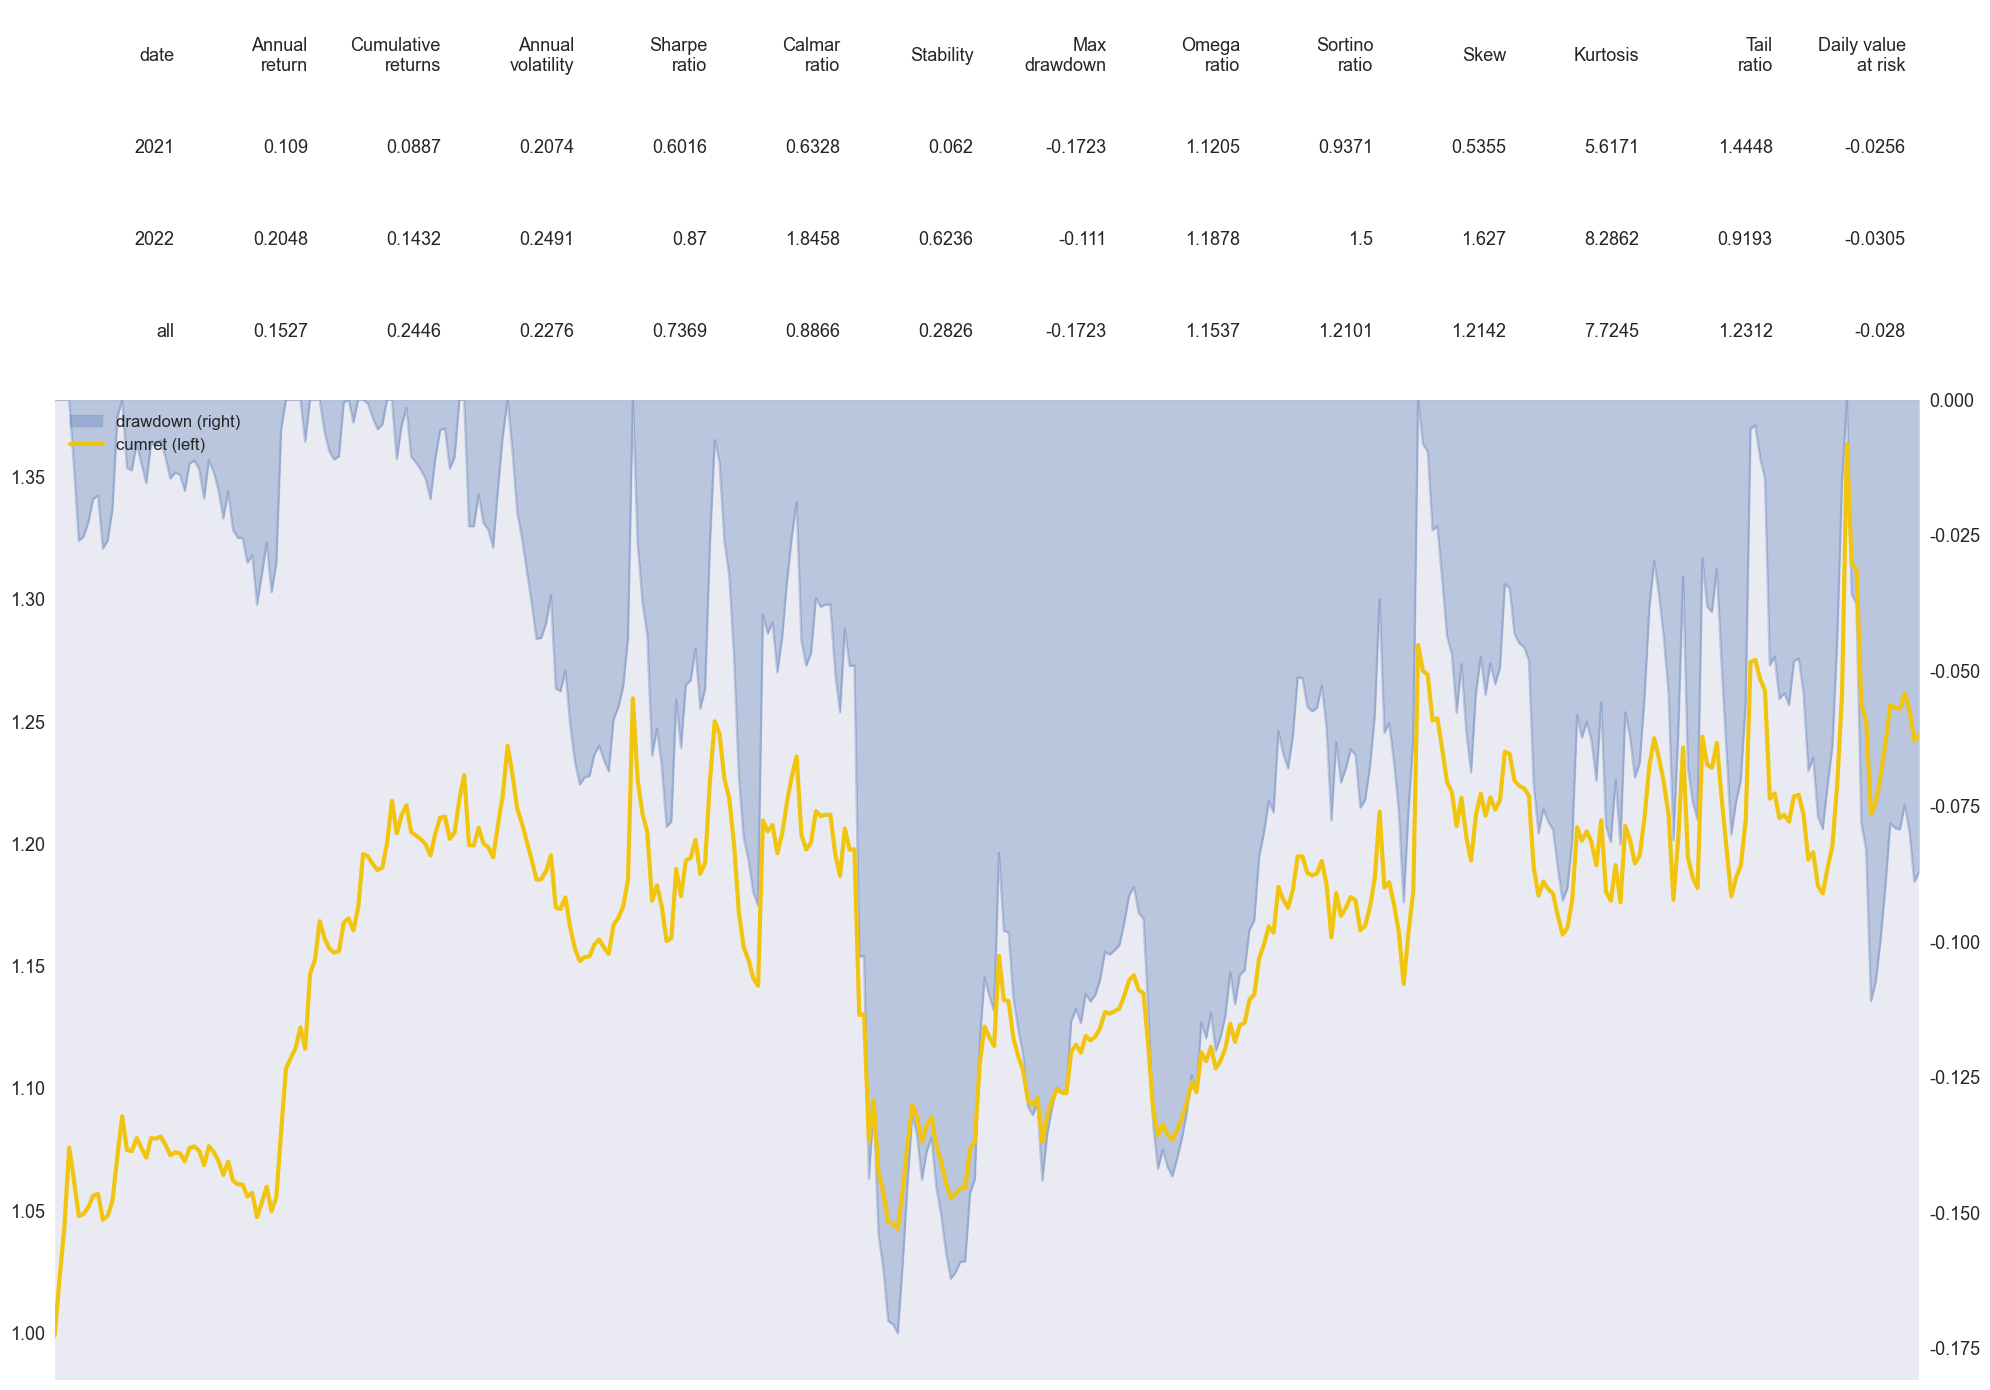

In [151]:
pnl_curve(f"{ind_name}", results)